In [258]:
#import all the necessory
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib widget 
%matplotlib inline

In [259]:
#Import Data
data = pd.read_csv("dataset.csv", low_memory=False)

In [260]:
#Checking if data is properly imported
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


In [261]:
#checking the lower 5 values
data.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/2015
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [263]:
#checking the data types (pandas) of various features
data.dtypes

stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [265]:
#Checking the no. of null value
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [266]:
#its clear that there are a lot of null value in pm2.5, agency, stn_code, spm , etc.
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [267]:
replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
data.replace(replacements, regex = True, inplace = True)
data["state"].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     2246
J

In [268]:
data['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

In [269]:
#deleting all values which have null in type attribute
data=data.dropna(axis = 0, subset = ['type'])

In [270]:
# deleting all values which are null in location attribute
data = data.dropna(axis = 0, subset = ['location'])

In [271]:
#deleting all null values in so2 attribute
data = data.dropna(axis = 0, subset = ['so2'])

In [272]:
data.isnull().sum()

stn_code                       119813
sampling_date                       0
state                               0
location                            0
agency                         125169
type                                0
so2                                 0
no2                              1981
rspm                            29643
spm                            228178
location_monitoring_station     20567
pm2_5                          386966
date                                4
dtype: int64

In [273]:
#not interested in agency
del data['agency']
del data['location_monitoring_station']
del data['stn_code']
del data['sampling_date']
#dataset after deleting the above columns
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990


In [274]:
data['type'].value_counts()

Residential, Rural and other Areas    173027
Industrial Area                        92414
Residential and others                 70882
Industrial Areas                       44823
Sensitive Area                          8856
Sensitive Areas                         4108
RIRUO                                   1304
Sensitive                                456
Industrial                               183
Residential                              108
Name: type, dtype: int64

In [275]:
# We do not need all these types 
#changing type to only 3 categories
a = list(data['type'])
for i in range(0, len(data)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
#the above code takes all the different types and changes them into 3 types( RESIDENTIAL, INDUSTRIAL, OTHER )
data['type'] = a
data['type'].value_counts()

Residential    244017
Industrial     137420
Other           14724
Name: type, dtype: int64

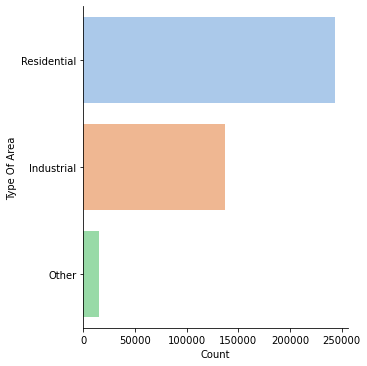

In [276]:
g=sns.catplot( y="type", kind = "count", palette = "pastel", data = data,  orient="h")
g.set_axis_labels("Count","Type Of Area")

In [277]:
counts = data["type"].value_counts()
percent = data["type"].value_counts(normalize=True)
percent100 = data["type"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
df = pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})
df

,counts,per,per100
Residential,244017,0.615954,61.6%
Industrial,137420,0.346879,34.7%
Other,14724,0.037167,3.7%


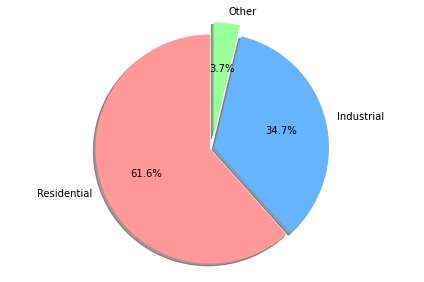

In [278]:
# Pie chart
labels = ['Residential','Industrial','Other']
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.02, 0.02, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(df.per, colors = colors, labels=labels,explode=explode ,autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [279]:
# Trying to get rid of null values
grp_state = data.groupby('state')
def impute_mean_by_state(series):
    return series.fillna(series.mean())

data['rspm']=grp_state['rspm'].transform(impute_mean_by_state)
data['so2']=grp_state['so2'].transform(impute_mean_by_state)
data['no2']=grp_state['no2'].transform(impute_mean_by_state)
data['spm']=grp_state['spm'].transform(impute_mean_by_state)
data['pm2_5']=grp_state['pm2_5'].transform(impute_mean_by_state)
data.describe()

,so2,no2,rspm,spm,pm2_5
count,396161.000000,396161.000000,396161.000000,392147.000000,112271.000000
mean,10.758950,26.156639,111.300928,218.117678,48.295883
std,11.116237,18.462806,73.513325,117.066880,21.715138
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,59.000000,151.000000,30.511628
50%,8.000000,22.000000,94.000000,207.595198,42.204089
75%,13.500000,32.800000,145.000000,251.000000,64.979624
max,909.000000,876.000000,6307.033333,2610.000000,504.000000


In [280]:
#so2 vs state - desc order
so2 = data[['so2', 'state','year']].groupby(['state']).median().sort_values("so2", ascending = False)
so2

KeyError: "['year'] not in index"

In [ ]:
ax = sns.catplot(x="so2", y=so2.index, data=so2, kind="bar" , height=12)
plt.xticks(rotation=90)

In [ ]:
no2 = data[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False)
ax = sns.catplot(x="no2", y=no2.index, data=no2, kind="bar" , height=12)
plt.xticks(rotation=90)

In [ ]:
PM10 = data[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False)
ax = sns.catplot(x="rspm", y=PM10.index, data=PM10, kind="bar" , height=12)
plt.xticks(rotation=90)

In [ ]:
spm=data[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False)
ax = sns.catplot(x="spm", y=spm.index, data=spm, kind="bar" , height=12)
plt.xticks(rotation=90)

In [ ]:
data.describe()

In [ ]:
pm2_5=data[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).head(10)
ax = sns.catplot(x="pm2_5", y=pm2_5.index, data=pm2_5, kind="bar" , height=12)
plt.xticks(rotation=90)

In [ ]:
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5'']
sns.pairplot(data[cols],height = 2.5)
plt.show()

In [ ]:
corrmat = data.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)

In [ ]:
# Creating an year column
data['date'] = pd.to_datetime(data['date'], format = '%m/%d/%Y')
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]
data.head()



In [ ]:

# Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(data.pivot_table('so2', index = 'state',
columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})


In [ ]:

# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(data.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})


In [ ]:


# heatmap of rspm
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('rspm'))
sns.heatmap(data.pivot_table('rspm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})
    


In [ ]:

# heatmap of spm
f, ax = plt.subplots(figsize = (10, 10))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(data.pivot_table('spm', index ='state',
                columns = ['year'], aggfunc = 'median', margins = True)
                , cmap = "YlGnBu", linewidths = 0.5, ax = ax, cbar_kws = {'label': 'Annual Average'})

In [ ]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['SOi']=data['so2'].apply(cal_SOi)


In [ ]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['Noi']=data['no2'].apply(cal_Noi)


In [ ]:
def cal_RSPMi(rspm):
    rpi=0
    if(rspm<=100):
     rpi = rspm
    elif(rspm>=101 and rspm<=150):
     rpi= 101+(rspm-101)*((200-101)/(150-101))
    elif(rspm>=151 and rspm<=350):
     ni= 201+(rspm-151)*((300-201)/(350-151))
    elif(rspm>=351 and rspm<=420):
     ni= 301+(rspm-351)*((400-301)/(420-351))
    elif(rspm>420):
     ni= 401+(rspm-420)*((500-401)/(420-351))
    return rpi
data['RSPMi']=data['rspm'].apply(cal_RSPMi)


In [ ]:

def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
data['SPMi']=data['spm'].apply(cal_SPMi)


In [ ]:
def cal_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi
data['PMi']=data['pm2_5'].apply(cal_pmi)


In [ ]:
def cal_aqi(si,ni,rspmi,spmi,pmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi ):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi ):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['RSPMi'],x['SPMi'],x['PMi']),axis=1)
df= data[['state','SOi','Noi','RSPMi','SPMi','AQI']]
df.head()

In [ ]:
data.head()

In [ ]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

data['AQI_Range'] = data['AQI'] .apply(AQI_Range)
data.head()

In [ ]:
data=data.dropna(subset=['spm']) #spm
data=data.dropna(subset=['pm2_5']) #spm
data.isna().sum() #all null values removed

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
X = data[['SOi','Noi','RSPMi','SPMi','PMi']]
Y = data['AQI']
Y.head()
X.head()

In [ ]:
data[['SOi','Noi','RSPMi','SPMi','PMi','AQI']].head()

In [ ]:
corrmat = data[['SOi','Noi','RSPMi','SPMi','PMi','AQI']].corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [ ]:
LR = LinearRegression() 
LR.fit(X_train, y_train)

In [ ]:
LR.intercept_

In [ ]:
LR.coef_

In [ ]:
LR.predict(X_test)

In [ ]:
predictions = LR.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
LR.score(X_test,y_test)

In [ ]:
print('R^2_Square:%.2f '% r2_score(y_test, predictions))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, predictions)))